<a href="https://colab.research.google.com/github/shuoscaryo/python_nn/blob/main/number_guesser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Add the libraries
  - **torch**: pytorch library
  - **torch.nn**: to access faster loss functions and optimizer
  - **torchvision**: pytorch library for computer vision
  - **torchvision.datasets**: for downloading the images data
  - **torch.utils.data.Dataset**: dataset class for pytorch
  - **torch.utils.data.Dataloader**: Creates iterable object from data


In [4]:
# Import pytorch to create the neural network
import torch
import torch.nn as nn

# Import torchvision to get the data
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


## 1. Getting the dataset

Download the data of MNIST numbers- https://pytorch.org/vision/0.16/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST


In [5]:
# Setup training data
train_data = datasets.MNIST(
    root = "data", # Directory in this PC where data will download
    train = True, # Get the training dataset
    download = True, # Download the data?
    transform = ToTensor(), # Convert downloaded data to tensor
    target_transform=None # How to transform the labels/targets
)

# Setup test data
test_data = datasets.MNIST(
    root = "data", # Directory in this PC where data will download
    train = False, # Get the testing dataset
    download = True, # Download the data?
    transform = ToTensor(), # Convert downloaded data to tensor
    target_transform=None # How to transform the labels/targets
)

100%|██████████| 9912422/9912422 [00:00<00:00, 112720791.36it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 17206774.69it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33803828.15it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4054166.58it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [26]:
image,label = test_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [18]:
# Tags of the images
class_names = train_data.classes
print ("class_names:")
print(class_names)

# Tags with index
class_to_idx = train_data.class_to_idx
print("class_to_idx:")
print(class_to_idx)

class_names:
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
class_to_idx:
{'0 - zero': 0, '1 - one': 1, '2 - two': 2, '3 - three': 3, '4 - four': 4, '5 - five': 5, '6 - six': 6, '7 - seven': 7, '8 - eight': 8, '9 - nine': 9}


In [21]:
# Check the shape
print(f"Image_shape: {image.shape} -> [color_channels, height, width]")
print(f"Image_label: {class_names[label]}")

Image_shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image_label: 7 - seven


### 1.2 Visualizing the data
The image is shape [1,28,28] and it gives an error to plt. Squeeze removes all the dimensions of size 1, and imshow can handle [28,28] shapes.

(-0.5, 27.5, 27.5, -0.5)

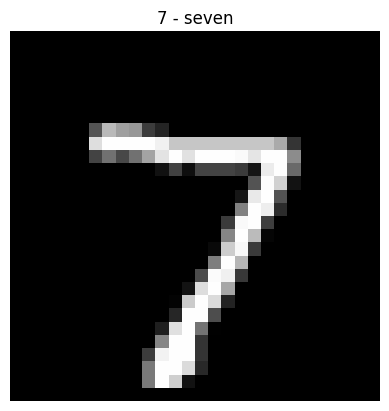

In [28]:
# Plot 1 image
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False)

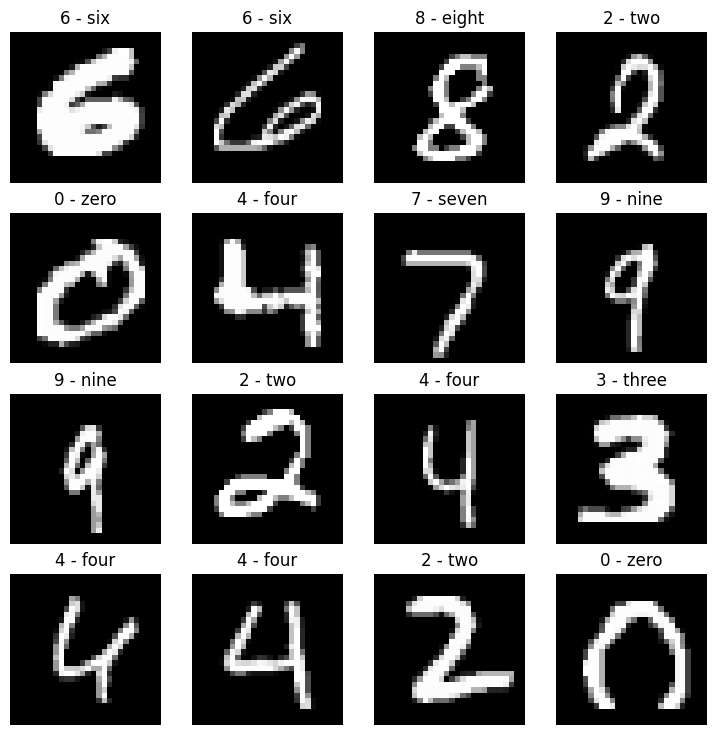

In [34]:
# Plot more images
torch.manual_seed(42) # Set a seed so the random values always are the same
fig = plt.figure(figsize=(9,9)) # Create a new image with size 9x9 inches
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
  # Pick a random sample from the dataset, the function returns tensor so it has to be converted
  # to int with item
  random_idx = torch.randint(0, len(train_data), size=[1]).item()

  # Separate image and the label from the sample
  img, label = train_data[random_idx]

  # Generate a grid of 4x4 and each i is where the plot will be printed
  fig.add_subplot(rows,cols,i)

  # Print the image in the plot with black and white
  plt.imshow(img.squeeze(), cmap="gray")

  # Add a title of the label
  plt.title(class_names[label])

  # remove axis
  plt.axis(False)

## 2. Prepare DataLoader
DataLoader turns a dataset into a python iterable.

Turns the data into batches
- A batch allows to train with a sample of the dataset to avoid filling up the memory
- Allows the neural network to update its gradients more time per epoch (iteration)

In [38]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
# Load train data with dataloader
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True # Mix the data
)

# Load test data with dataloader
test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle = False # No need to shuffle
)

In [40]:
# Check what has been created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"length of train_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x795b65b5e8c0>, <torch.utils.data.dataloader.DataLoader object at 0x795b65b5f7c0>)
length of train_dataloader: 1875 batches of 32
length of train_dataloader: 313 batches of 32
